# Pytorch | Computer Vision | CNN | Dataset Fashion MINIST

## In this I make computer vision model for Fashion MINIST
- This is not good model because i use only CNN layers.
- This is only for study purpose and check.

### Step 1 : Import Necessary Import

In [94]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

### Device Agnostic code
This code ensure if GPU is present it will gpu otherwise use CPU

In [95]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Step 2: Get the Data MINIST Dataset | Download from pytorch inbuild datsets

In [96]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

#### 2.1 Check Train Sample
**Note:** In this sample example last digit you see is label which denoted by integer. 

In [97]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

#### 2.2 Check the shape of the image
**Note:** Check what shape image follow NCHW or NHWC
where 
- N = Number of color images
- C = No. of color channel
- H = Height
- W = Width


In [98]:
image.shape

torch.Size([1, 28, 28])

[1, 28, 28] Where `[ color_channels=1, height=28, width=28]`

#### 2.3 Check number of samples

In [99]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

#### 2.4 Check are different classes Avilable as per interge in image data

In [100]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### 2.5 Visualize Our data

Image Shape : torch.Size([1, 28, 28])


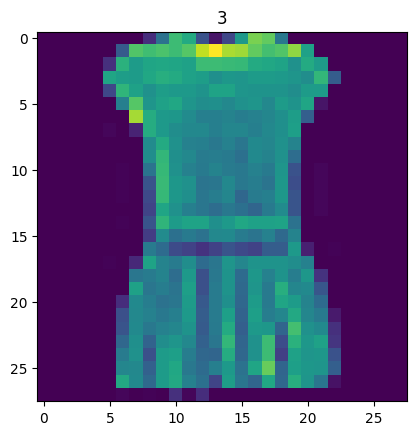

In [101]:
import matplotlib.pyplot as plt
image, label = train_data[3]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

#### 2.6 Change the image into grayscale

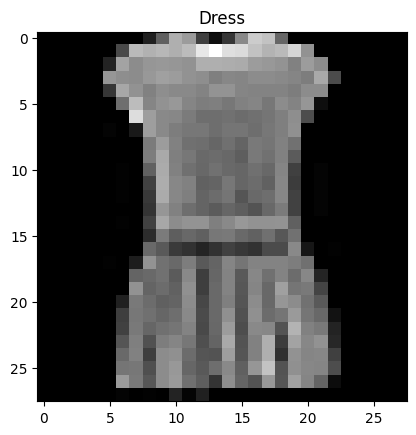

In [102]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

#### 2.7 Check more images

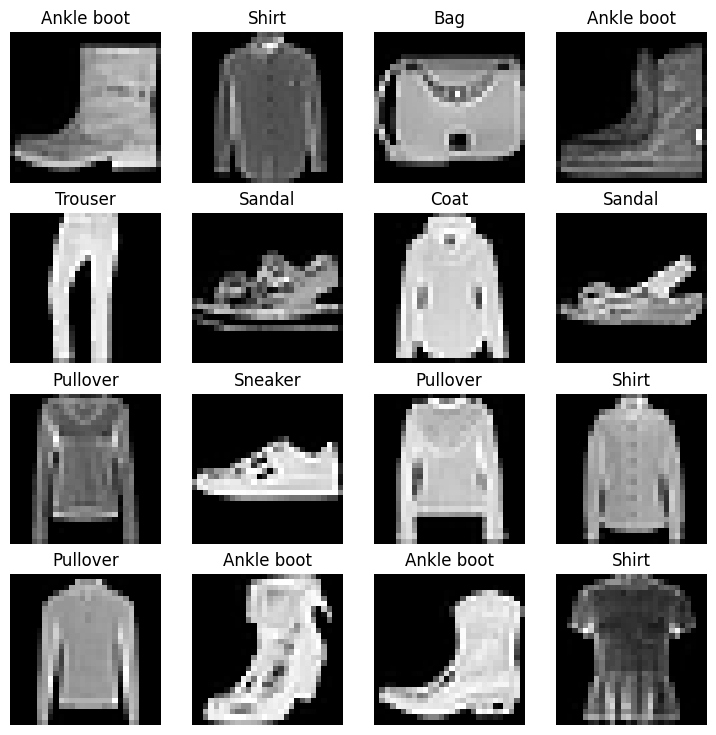

In [103]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False);

### Step 3: Prepare DataLoader
- It turns large Dataset into a python iterable of smaller chunks called batches or mini-batches.
- batches are set by batch_size
- Common pratices are using thb batch size power of 2 like 32, 64, 128 etc.


In [104]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             )

print(f"Dataloaders : {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x00000132D3553790>, <torch.utils.data.dataloader.DataLoader object at 0x00000132D433CC00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


#### 3.1 Check Out Inside training dataloader

In [105]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

#### 3.2 Checkout the Sample

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


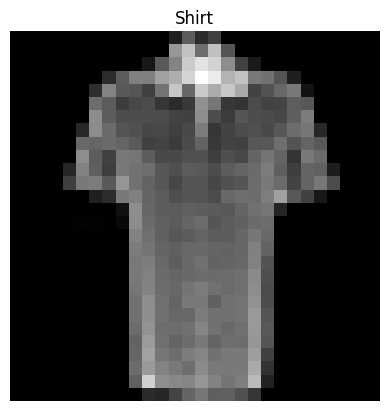

In [106]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Step 4 : Build a baseline model

#### 4.1 Compress the dimensions of a tensor into a single vector using `nn.Flatten()`

In [107]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


#### 4.2 Create Baseline Model Class with Convolution Neural Network

In [108]:
class FashionMNISTModelCNN(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [109]:
torch.manual_seed(42)

model_cnn = FashionMNISTModelCNN(
        input_shape=1,
        hidden_units=10,
        output_shape=len(class_names)
)
model_cnn.to(device)

FashionMNISTModelCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [110]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [111]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=0.1)

### Step 5: Setup loss, Optimizer and evaluation metrics

In [112]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), 
                             lr=0.1)

### Optional : Time for check the timing during training

In [113]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Step 6: Creating a Training Loop & Start Tranining

In [114]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) 
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

#### Start Training

In [115]:
import tqdm as notebook_tqdm
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)

# Measure time
train_time_start_model_cnn = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_cnn, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_cnn,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_cnn = timer()
total_train_time_model_cnn= print_train_time(start=train_time_start_model_cnn,
                                           end=train_time_end_model_cnn,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58653 | Train accuracy: 78.72%


 33%|███▎      | 1/3 [00:24<00:49, 24.50s/it]

Test loss: 0.38549 | Test accuracy: 86.31%

Epoch: 1
---------
Train loss: 0.36228 | Train accuracy: 86.97%


 67%|██████▋   | 2/3 [00:49<00:24, 24.78s/it]

Test loss: 0.35262 | Test accuracy: 87.19%

Epoch: 2
---------
Train loss: 0.32397 | Train accuracy: 88.32%


100%|██████████| 3/3 [01:15<00:00, 25.27s/it]

Test loss: 0.32068 | Test accuracy: 88.30%

Train time on cpu: 75.814 seconds


### Step 7 : Evaluate the CNN Model results

In [116]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) 
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}

model_cnn_results = eval_model(model=model_cnn, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)

model_cnn_results

{'model_name': 'FashionMNISTModelCNN',
 'model_loss': 0.3206831216812134,
 'model_acc': 88.29872204472844}

### Step 8: Make Preidcition 

In [117]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [118]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) 

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 

            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

pred_probs= make_predictions(model=model_cnn, 
                             data=test_samples)


print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

pred_probs[:2]

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


tensor([[3.8114e-08, 2.5194e-08, 2.8549e-08, 5.8431e-08, 1.3654e-08, 9.9989e-01,
         2.8193e-07, 4.3962e-06, 4.1851e-06, 9.6152e-05],
        [3.9357e-02, 7.2312e-01, 2.1504e-03, 1.3462e-01, 4.0615e-02, 6.4464e-05,
         5.7972e-02, 2.6345e-04, 1.5033e-03, 3.3799e-04]])

In [119]:

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

#### 8.1 Plot predictions

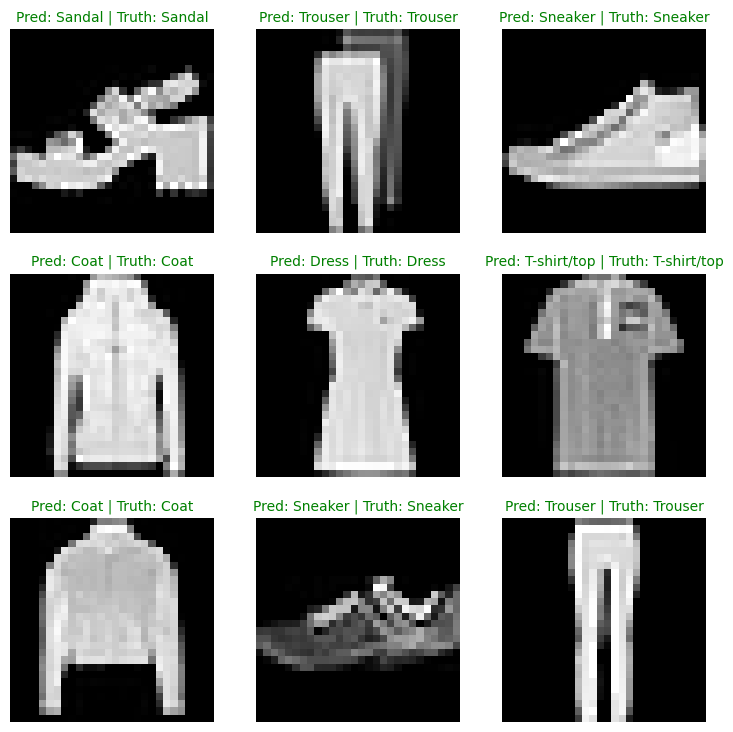

In [120]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") 
  else:
      plt.title(title_text, fontsize=10, c="r") 
  plt.axis(False);

#### 8.2 Making a confusion matrix for further prediction evaluation

In [121]:
from tqdm.auto import tqdm

y_preds = []
model_cnn.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_cnn(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:02<00:00, 132.01it/s]


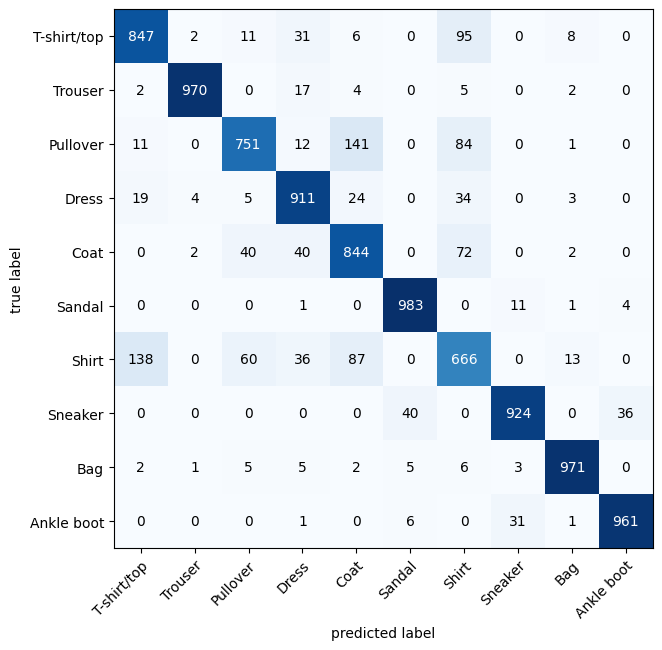

In [122]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names, 
    figsize=(10, 7)
);

### Step 9:  Save and load best performing model

In [123]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_linear.pth" 
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

checkpoint = {
    "model_state_dict": model_cnn.state_dict(),
    "model_results": model_cnn_results,  
    # "epoch": epoch,                 # Optional: Add other training info
    # "optimizer_state_dict": optimizer.state_dict(), 
}

print(f"Saving model and results to: {MODEL_SAVE_PATH}")
torch.save(obj=checkpoint, f=MODEL_SAVE_PATH)

Saving model and results to: models\model_linear.pth


In [125]:
# 1. Load the entire saved checkpoint dictionary
loaded_checkpoint = torch.load(f=MODEL_SAVE_PATH)

# 2. Load the model's state_dict 
loaded_model_cnn = FashionMNISTModelCNN(input_shape=1,
                                        hidden_units=10, 
                                        output_shape=len(class_names))

loaded_model_cnn.load_state_dict(loaded_checkpoint["model_state_dict"])
loaded_model_cnn.to(device)

# 3. Load the results dictionary!
loaded_model_results_dict = loaded_checkpoint["model_results"] 

# 4. Access the loss value successfully!
loaded_loss = loaded_model_results_dict["model_loss"] 

print(f"Loaded Loss: {loaded_loss}")

Loaded Loss: 0.3206831216812134


In [126]:
model_cnn_results

{'model_name': 'FashionMNISTModelCNN',
 'model_loss': 0.3206831216812134,
 'model_acc': 88.29872204472844}

##### 9.1 Compare the saved loaded model loss with original loss

In [127]:

torch.isclose(torch.tensor(model_cnn_results["model_loss"]), 
              torch.tensor(loaded_loss),
              atol=1e-08, 
              rtol=0.0001) 

tensor(True)

### Step 10: Use your model
- Load the saved model.
- Do atleast 1 prediction with 1 image from test data with load model
- Plot the image you want to predict.

In [128]:
## Load the model
loaded_checkpoint = torch.load(f=MODEL_SAVE_PATH)

loaded_model_cnn = FashionMNISTModelCNN(input_shape=1,
                                        hidden_units=10, 
                                        output_shape=len(class_names))

loaded_model_cnn.load_state_dict(loaded_checkpoint["model_state_dict"])
loaded_model_cnn.to(device)

loaded_model_results_dict = loaded_checkpoint["model_results"] 

Image Shape : torch.Size([1, 28, 28])


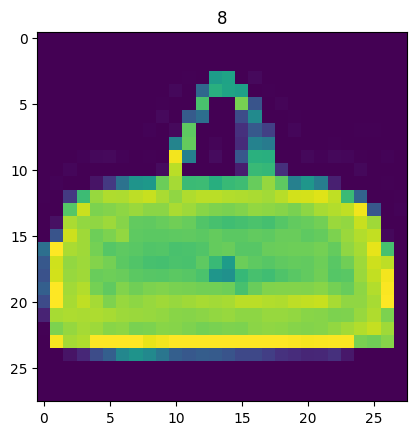

In [ ]:
test_samples = []
test_samples.append(test_data[62])

image, label = test_data[62]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);


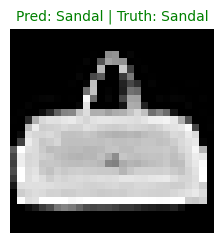

In [130]:
plt.figure(figsize=(9, 9))
for i, sample in enumerate(test_samples):
  
  image, label = sample
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(image.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r") 
  plt.axis(False);

In [133]:
def make_predictions_with_cnn(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            image, label = sample
            image = torch.unsqueeze(image, dim=0).to(device) 
            #image = image.flatten(start_dim=1) 
            pred_logit = model(image)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [134]:
pred_probs_loaded_model = make_predictions_with_cnn(model = loaded_model_cnn,
                              data=test_samples)
pred_classes_loaded = pred_probs_loaded_model.argmax(dim=1)
pred_classes_loaded

tensor([8])

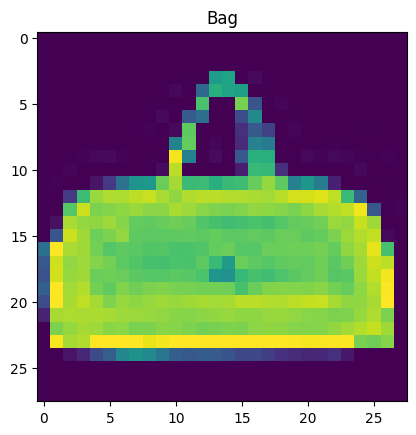

In [135]:
plt.imshow(image.squeeze())
plt.title(class_names[pred_classes_loaded]);